# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [158]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [159]:
websites = pd.read_csv('./data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [160]:
display(websites.head())
# display(websites.tail())

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [161]:
websites.shape

# sample size: 1781

(1781, 21)

In [162]:
websites.dtypes

#
# All numeric columns are correctly typed as numeric.
#
# Columns with dates may need to convert type (at the moment it's "object"); they may also need to be encoded:
# - WHOIS_REGDATE                 
# - WHOIS_UPDATED_DATE
# 

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [163]:
display(websites.describe())

# 
# as expected, numeric values will require normalization/standardization
# 

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [164]:
display(websites.isna().sum())

#
# there's multiple columns with missing data.
# (missing data is particularly relevant for some columns like CONTENT_LENGTH)
# 


URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [165]:
display(websites[websites["Type"] == 0].shape)
display(websites[websites["Type"] == 1].shape)

display(f"Percentage of rows with Type equals to 1 --> {websites[websites["Type"] == 1].shape[0] / websites[websites["Type"] == 0].shape[0] * 100}")

#
# Column "Type" seems to be the target (probably 1 indicating a malign website, and 0 a benign site)
#
#
# - 13.8% of rows have Type == 1
#

(1565, 21)

(216, 21)

'Percentage of rows with Type equals to 1 --> 13.801916932907348'

#### Next, evaluate if the columns in this dataset are strongly correlated.

If our dataset has strongly correlated columns, we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

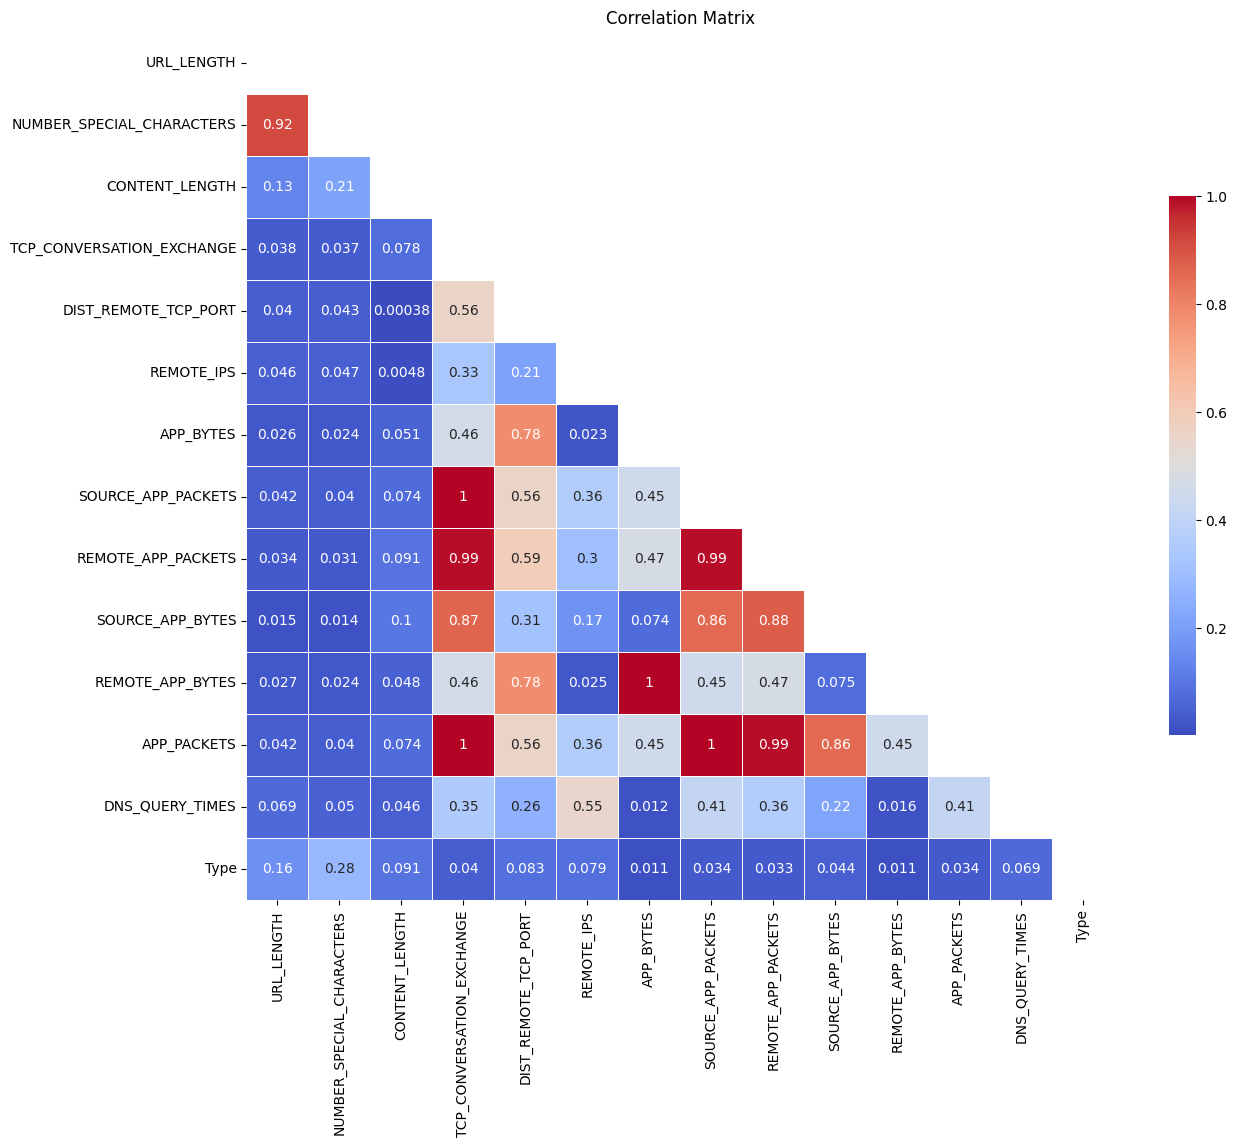

In [166]:
# 
# create a correlation matrix & heatmap, using the numeric columns in the dataset.
# 


import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = websites.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix=np.abs(websites[numeric_columns].corr())

#Set up mask for triangle representation
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = correlation_matrix)
plt.title("Correlation Matrix")
plt.show()


In [167]:
#
# Some features have a perfect linear relationship, some others have very high correlations.
#
#
# Candidates to Remove:
# - TCP_CONVERSATION_EXCHANGE
# - SOURCE_APP_PACKETS
# - REMOTE_APP_PACKETS
#

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

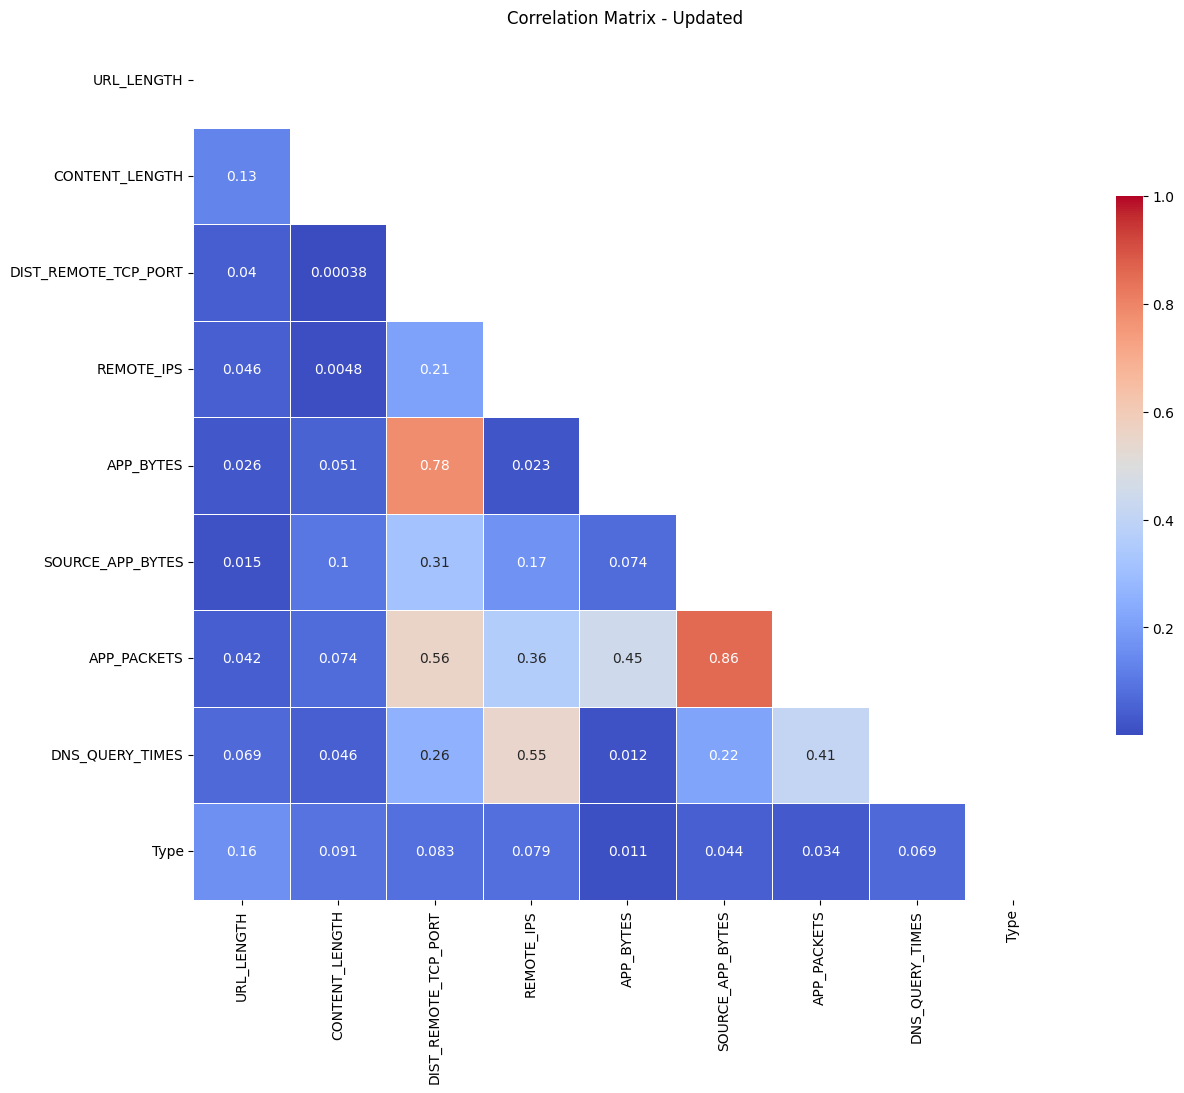

In [168]:
columns_to_drop_1 = ["TCP_CONVERSATION_EXCHANGE", "SOURCE_APP_PACKETS", "REMOTE_APP_PACKETS", "REMOTE_APP_BYTES", "NUMBER_SPECIAL_CHARACTERS"]

#
# Correlation Matrix - Updated 
#


websites_reduced = websites.drop(columns=columns_to_drop_1)


numeric_columns = websites_reduced.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix=np.abs(websites_reduced[numeric_columns].corr())

#Set up mask for triangle representation
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = correlation_matrix)
plt.title("Correlation Matrix - Updated ")
plt.show()



# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [169]:
display(websites_reduced.isna().sum())
display(websites_reduced.shape)

URL                       0
URL_LENGTH                0
CHARSET                   7
SERVER                  176
CONTENT_LENGTH          812
WHOIS_COUNTRY           306
WHOIS_STATEPRO          362
WHOIS_REGDATE           127
WHOIS_UPDATED_DATE      139
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
SOURCE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

(1781, 16)

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [170]:
columns_to_drop_2 = ["CONTENT_LENGTH"]

websites_reduced = websites_reduced.drop(columns=columns_to_drop_2)


display(websites_reduced.isna().sum())
display(websites_reduced.isna().sum() / websites_reduced.shape[0] )



URL                       0
URL_LENGTH                0
CHARSET                   7
SERVER                  176
WHOIS_COUNTRY           306
WHOIS_STATEPRO          362
WHOIS_REGDATE           127
WHOIS_UPDATED_DATE      139
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
SOURCE_APP_BYTES          0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

URL                     0.000000
URL_LENGTH              0.000000
CHARSET                 0.003930
SERVER                  0.098821
WHOIS_COUNTRY           0.171814
WHOIS_STATEPRO          0.203257
WHOIS_REGDATE           0.071308
WHOIS_UPDATED_DATE      0.078046
DIST_REMOTE_TCP_PORT    0.000000
REMOTE_IPS              0.000000
APP_BYTES               0.000000
SOURCE_APP_BYTES        0.000000
APP_PACKETS             0.000000
DNS_QUERY_TIMES         0.000561
Type                    0.000000
dtype: float64

In [171]:
#
# Handle rows missing "whois" data:
#
# The columns for Whois are missing quite a few values.
# Considering that the percentage of missing datapoints is not that high (<30%)
# , and assuming that whois information may be relevant for the model, we will not drop the columns.
# Instead, we'll analyze them in detail and consider imputation or row removal.
# 


#
# Check if the missing values for Whois are all in the same rows or dispersed in different rows
#

missing_country_and_pro = websites_reduced[
        (websites_reduced["WHOIS_COUNTRY"].isna()) & 
        (websites_reduced["WHOIS_STATEPRO"].isna())
    ].shape[0]
display(missing_country_and_pro)



missing_4 = websites_reduced[
        (websites_reduced["WHOIS_COUNTRY"].isna()) & 
        (websites_reduced["WHOIS_STATEPRO"].isna()) &
        (websites_reduced["WHOIS_REGDATE"].isna()) &
        (websites_reduced["WHOIS_UPDATED_DATE"].isna())
    ].shape[0]
display(missing_4)

# 
# Result: 
# - data missing info about whois tends to be in the same rows, rather than dispersed in different rows.
# - we will proceed to drop all the rows missing whois information.
# 


display(f"Number of entries before dropping rows missing whois: {websites_reduced.shape[0]}")
websites_reduced = websites_reduced.dropna(subset=["WHOIS_COUNTRY", "WHOIS_STATEPRO", "WHOIS_REGDATE", "WHOIS_UPDATED_DATE"])
display(f"Number of entries after dropping rows missing whois: {websites_reduced.shape[0]}")

306

121

'Number of entries before dropping rows missing whois: 1781'

'Number of entries after dropping rows missing whois: 1416'

In [172]:
#
# Handle rows missing "server", "charset", and "dns_query_times" data:
#
# Considering the amount of data points that are missing that info is relatively low (<10%), we'll proceed to remove those rows
#

display(f"Number of entries before dropping... {websites_reduced.shape[0]}")
websites_reduced = websites_reduced.dropna(subset=["SERVER", "CHARSET", "DNS_QUERY_TIMES"])
display(f"Number of entries after dropping... {websites_reduced.shape[0]}")


'Number of entries before dropping... 1416'

'Number of entries after dropping... 1257'

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [173]:
display(websites_reduced.isna().sum())

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
SOURCE_APP_BYTES        0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

In [174]:
#
# To ensure we haven't introduced an important class imbalance,
# we'll check that the target class distribution remains similar than the target in the original dataset.
#
#

total_entries_original = websites.shape[0]
number_of_positives_original = websites[websites["Type"]==1].shape[0]

total_entries_reduced = websites_reduced.shape[0]
number_of_positives_reduced = websites_reduced[websites_reduced["Type"]==1].shape[0]

display(f"Percentage of positives in the original dataset: {number_of_positives_original / total_entries_original * 100} ")
display(f"Percentage of positives in the reduced dataset: {number_of_positives_reduced / total_entries_reduced * 100} ")

#
# After removing rows, we can see a change in the % of positives, 
# however, the change is relatively small, suggesting no major class imbalance was introduced.
#


'Percentage of positives in the original dataset: 12.128017967434026 '

'Percentage of positives in the reduced dataset: 11.296738265712012 '

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [175]:
websites_reduced["WHOIS_COUNTRY"].unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [176]:
#
# Consolidate the country values with consistent country codes
#

websites_reduced.loc[websites_reduced['WHOIS_COUNTRY'] == "[u'GB'; u'UK']", 'WHOIS_COUNTRY'] = 'GB'
websites_reduced.loc[websites_reduced['WHOIS_COUNTRY'] == "UK", 'WHOIS_COUNTRY'] = 'GB'
websites_reduced.loc[websites_reduced['WHOIS_COUNTRY'] == "ru", 'WHOIS_COUNTRY'] = 'RU'
websites_reduced.loc[websites_reduced['WHOIS_COUNTRY'] == 'us', 'WHOIS_COUNTRY'] = 'US'

websites_reduced["WHOIS_COUNTRY"].unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', 'NL', 'UG', 'JP',
       'CN', 'SI', 'KY', 'AT', 'CZ', 'PH', 'LV', 'TR', 'ES', 'HK', 'UA',
       'CH', 'BS', 'PK', 'IL', 'DE', 'SE', 'IT', 'NO', 'BE', 'BY', 'AE',
       'IE', 'UY', 'KG'], dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

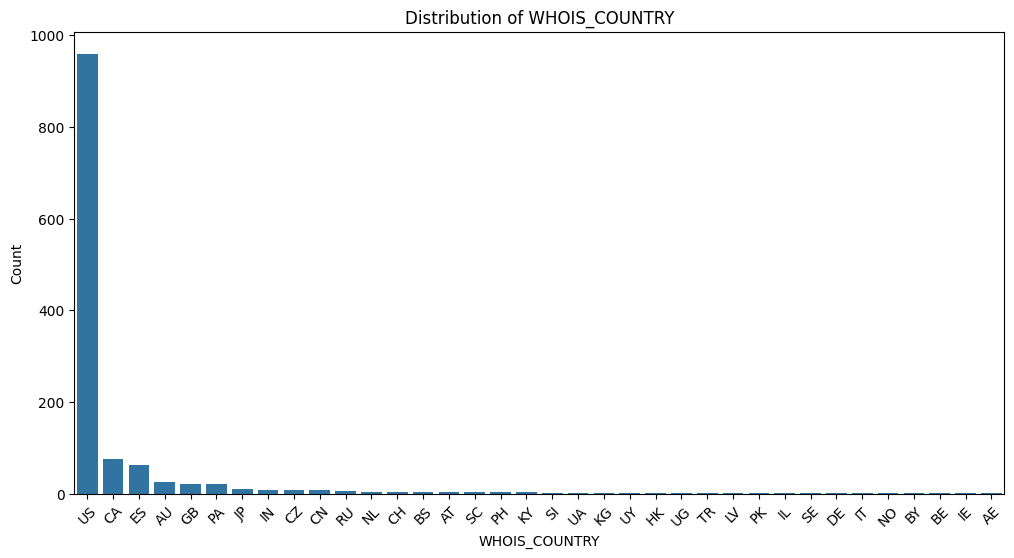

In [177]:
# display(websites_reduced["WHOIS_COUNTRY"].value_counts())

# render bar plot for WHOIS_COUNTRY
plt.figure(figsize=(12, 6))
sns.countplot(data=websites_reduced, x='WHOIS_COUNTRY', order=websites_reduced['WHOIS_COUNTRY'].value_counts().index)
plt.title('Distribution of WHOIS_COUNTRY')
plt.xticks(rotation=45)
plt.xlabel('WHOIS_COUNTRY') 
plt.ylabel('Count')
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

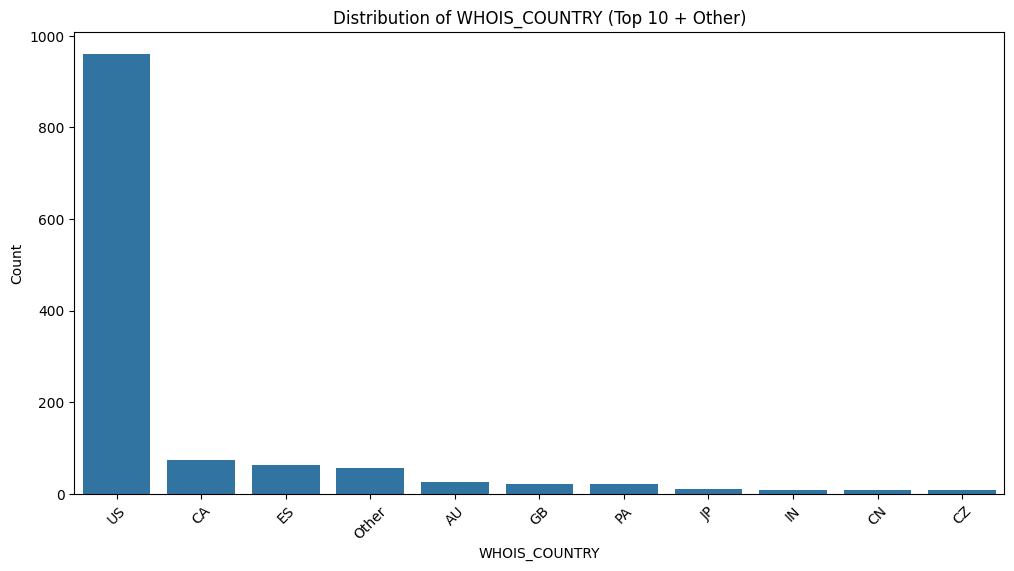

In [178]:
# keep the top 10 countries and group the rest as "Other"
top_countries = websites_reduced['WHOIS_COUNTRY'].value_counts().nlargest(10).index
websites_reduced['WHOIS_COUNTRY'] = websites_reduced['WHOIS_COUNTRY'].apply(
    lambda x: x if x in top_countries else 'Other'
)

# render bar plot for WHOIS_COUNTRY after grouping
plt.figure(figsize=(12, 6))
sns.countplot(data=websites_reduced, x='WHOIS_COUNTRY', order=websites_reduced['WHOIS_COUNTRY'].value_counts().index)   
plt.title('Distribution of WHOIS_COUNTRY (Top 10 + Other)')
plt.xticks(rotation=45)
plt.xlabel('WHOIS_COUNTRY')
plt.ylabel('Count')
plt.show()


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [179]:
#
# Drop the columns 'WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'
#
cols_to_drop_whois = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites_reduced = websites_reduced.drop(columns=cols_to_drop_whois)
display(websites_reduced.shape)

(1257, 12)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [180]:
websites_reduced.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [181]:
#
# Drop column "URL"
#

websites_reduced = websites_reduced.drop("URL", axis=1, errors="ignore")

display(websites_reduced.shape)

(1257, 11)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [182]:
websites_reduced["CHARSET"].unique()

array(['ISO-8859-1', 'UTF-8', 'iso-8859-1', 'us-ascii', 'utf-8',
       'windows-1251', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [183]:
display(websites_reduced["SERVER"].nunique())


193

In [184]:
websites_reduced["SERVER"].value_counts()

SERVER
Apache                                                           311
nginx                                                            144
cloudflare-nginx                                                  80
Microsoft-HTTPAPI/2.0                                             76
GSE                                                               49
                                                                ... 
My Arse                                                            1
IdeaWebServer/v0.80                                                1
Apache/2.4.17 (Unix) OpenSSL/1.0.1e-fips PHP/5.6.19                1
Microsoft-IIS/7.5; litigation_essentials.lexisnexis.com  9999      1
Apache/2.2.16 (Debian)                                             1
Name: count, Length: 193, dtype: int64

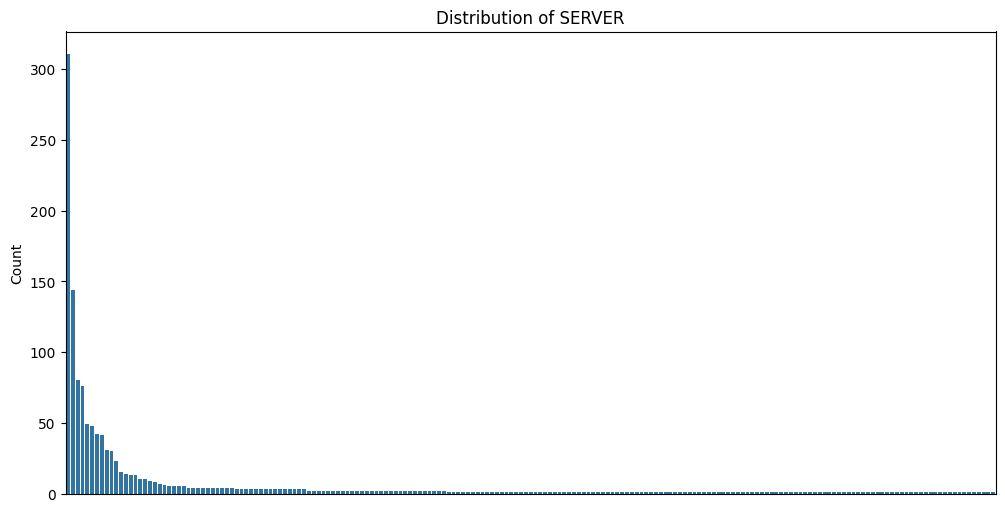

In [185]:
plt.figure(figsize=(12, 6))
sns.countplot(data=websites_reduced, x='SERVER', order=websites_reduced['SERVER'].value_counts().index)
plt.title('Distribution of SERVER')
plt.xticks([])
plt.xlabel('') 
plt.ylabel('Count')
plt.show()

In [186]:
websites_reduced.sample(30)

,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
763,46,utf-8,openresty,US,18,1,3331,62295,28,6.0,0
80,26,utf-8,nginx,US,19,5,2727,5765,30,4.0,0
1118,57,iso-8859-1,nginx,US,6,13,1627,2044,25,4.0,0
699,45,ISO-8859-1,Squeegit/1.2.5 (3_sir),US,0,0,0,0,0,0.0,0
1197,60,ISO-8859-1,cloudflare-nginx,US,22,3,4932,23578,35,6.0,0
275,35,UTF-8,Apache,CA,0,2,2102,20976,20,2.0,1
676,44,UTF-8,mw2107.codfw.wmnet,US,35,2,5987,38230,48,8.0,0
268,34,ISO-8859-1,nginx,US,0,2,716,1979,11,4.0,0
362,37,UTF-8,openresty,US,0,3,268,557,6,2.0,0
1561,88,UTF-8,Pizza/pepperoni,US,2,8,2133,17337,24,4.0,0


![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [187]:

# Rename all rows where SERVER contains the substring "Microsoft" (case insensitive) to "Microsoft"
websites_reduced.loc[websites_reduced['SERVER'].str.contains('microsoft', case=False, na=False), 'SERVER'] = 'Microsoft'

# Rename all rows where SERVER contains the substring "Apache" (case insensitive) to "Apache"
websites_reduced.loc[websites_reduced['SERVER'].str.contains('apache', case=False, na=False), 'SERVER'] = 'Apache'

# Rename all rows where SERVER contains the substring "nginx" (case insensitive) to "Nginx"
websites_reduced.loc[websites_reduced['SERVER'].str.contains('nginx', case=False, na=False), 'SERVER'] = 'Nginx'

# Rename all rows where SERVER is not "Microsoft", "Apache", or "Nginx" to "Other"
websites_reduced.loc[~websites_reduced['SERVER'].isin(['Microsoft', 'Apache', 'Nginx']), 'SERVER'] = 'Other'


In [188]:
websites_reduced["SERVER"].value_counts()

SERVER
Apache       491
Nginx        323
Other        299
Microsoft    144
Name: count, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)). Also, assign the data with dummy values to a new variable `website_dummy`.**

In [189]:
websites_reduced.dtypes

URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

In [190]:
websites_reduced.head()

,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,17,ISO-8859-1,Nginx,US,22,3,3812,18784,39,8.0,0
5,18,UTF-8,Nginx,Other,6,9,894,838,11,0.0,0
6,18,iso-8859-1,Apache,US,0,3,1189,8559,14,2.0,0
7,19,us-ascii,Microsoft,US,0,0,0,0,0,0.0,0
10,20,utf-8,Apache,US,0,0,0,0,0,0.0,0


In [191]:
#
# Fix: some charsets have different casing
#

websites_reduced.loc[websites_reduced['CHARSET'] == 'utf-8', 'CHARSET'] = 'UTF-8'
websites_reduced.loc[websites_reduced['CHARSET'] == 'iso-8859-1', 'CHARSET'] = 'ISO-8859-1'


In [192]:
columns_to_encode = ["CHARSET", "SERVER", "WHOIS_COUNTRY"]

display(websites_reduced[columns_to_encode].nunique())

website_dummy = pd.get_dummies(websites_reduced, columns=columns_to_encode, prefix=columns_to_encode, drop_first=True, dtype=int)


CHARSET           5
SERVER            4
WHOIS_COUNTRY    11
dtype: int64

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [193]:
website_dummy.dtypes

URL_LENGTH                int64
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
SOURCE_APP_BYTES          int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
CHARSET_UTF-8             int64
CHARSET_us-ascii          int64
CHARSET_windows-1251      int64
CHARSET_windows-1252      int64
SERVER_Microsoft          int64
SERVER_Nginx              int64
SERVER_Other              int64
WHOIS_COUNTRY_CA          int64
WHOIS_COUNTRY_CN          int64
WHOIS_COUNTRY_CZ          int64
WHOIS_COUNTRY_ES          int64
WHOIS_COUNTRY_GB          int64
WHOIS_COUNTRY_IN          int64
WHOIS_COUNTRY_JP          int64
WHOIS_COUNTRY_Other       int64
WHOIS_COUNTRY_PA          int64
WHOIS_COUNTRY_US          int64
dtype: object

In [194]:
pd.set_option('display.max_columns', None) # display all columns

website_dummy.head()

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_UTF-8,CHARSET_us-ascii,CHARSET_windows-1251,CHARSET_windows-1252,SERVER_Microsoft,SERVER_Nginx,SERVER_Other,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_Other,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
3,17,22,3,3812,18784,39,8.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5,18,6,9,894,838,11,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,18,0,3,1189,8559,14,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,19,0,0,0,0,0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
10,20,0,0,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [195]:
from sklearn.model_selection import train_test_split

X = website_dummy.drop("Type", axis=1)
y = website_dummy["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [196]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [197]:
logistic_model.fit(X_train, y_train)

C:\Users\luis\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

array([[215,   9],
       [ 16,  12]])

Text(0.5, 1.0, 'Confusion Matrix')

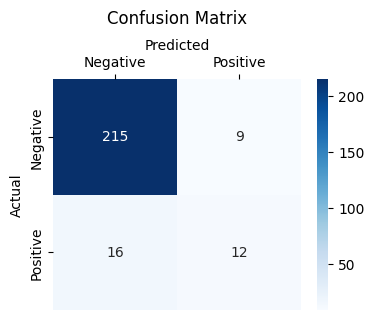

In [198]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = logistic_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

display(cm)

#
# Display as a heatmap
#

plt.figure(figsize=(4, 3))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=['Negative', 'Positive'], 
                 yticklabels=['Negative', 'Positive'])

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', pad=40)

In [199]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy:.2f}")

Accuracy of Logistic Regression model: 0.90


In [200]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       224
           1       0.57      0.43      0.49        28

    accuracy                           0.90       252
   macro avg       0.75      0.69      0.72       252
weighted avg       0.89      0.90      0.89       252



What are your thoughts on the performance of the model? Write your conclusions below.

In [201]:
# Recall: 0.21 - very low (out of 28 malicious websites, only 6 were detected)
# Precision: 0.55 - low (out of 11 websites flagged as malicious, only 6 were really malicious)

# Accuracy: 0.89 - the score is high but this is due to the fact that most websites are not malicious (the model can get a good accuracy score by flagging most websites as non malicious)


#
# Overall: poor performance.
# 
# Despite the high overall accuracy (0.89), 
# the model is unreliable for detecting malicious sites (very low recall), 
# and we're flagging many sites as malicious, when they are not (low precision)
#
# The low precision score is specially concerning considering this specific use case
# (we're having a lot of false positives)
#

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [202]:
from sklearn.neighbors import KNeighborsClassifier

knn_3_model = KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [203]:
knn_3_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [204]:
y_pred = knn_3_model.predict(X_test)

array([[217,   7],
       [  7,  21]])

Text(0.5, 1.0, 'Confusion Matrix')

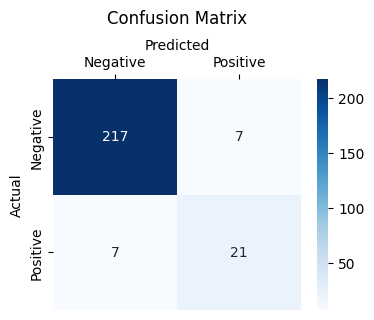

In [205]:
cm = confusion_matrix(y_test, y_pred)

display(cm)

#
# Display confusion matrix as a heatmap
#

plt.figure(figsize=(4, 3))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=['Negative', 'Positive'], 
                 yticklabels=['Negative', 'Positive'])

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', pad=40)


In [206]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN-3: {accuracy:.2f}")

Accuracy of KNN-3: 0.94


In [207]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       224
           1       0.75      0.75      0.75        28

    accuracy                           0.94       252
   macro avg       0.86      0.86      0.86       252
weighted avg       0.94      0.94      0.94       252



#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [208]:
knn_5_model = KNeighborsClassifier(n_neighbors=5)

In [209]:
knn_5_model.fit(X_train, y_train)

KNeighborsClassifier()

In [210]:
y_pred = knn_5_model.predict(X_test)

array([[222,   2],
       [  7,  21]])

Text(0.5, 1.0, 'Confusion Matrix')

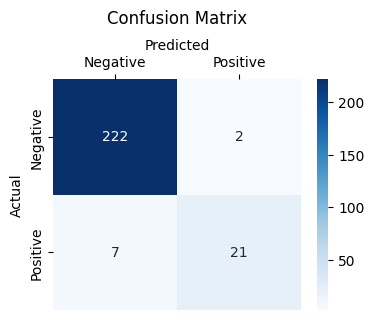

In [211]:
cm = confusion_matrix(y_test, y_pred)

display(cm)

#
# Display confusion matrix as a heatmap
#

plt.figure(figsize=(4, 3))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                 xticklabels=['Negative', 'Positive'], 
                 yticklabels=['Negative', 'Positive'])

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', pad=40)

In [216]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN-5: {accuracy:.2f}")

Accuracy of KNN-5: 0.96


In [213]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       224
           1       0.91      0.75      0.82        28

    accuracy                           0.96       252
   macro avg       0.94      0.87      0.90       252
weighted avg       0.96      0.96      0.96       252



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [217]:
# Yes!
# 
# Increasing k from 3 to 5 provides better results, 
# specially in terms of precision (which for this use case is likely a very important metric)
# 

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [215]:
# Your code here